**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Exam 2](http://54.243.252.9/engr-1330-webroot/5-ExamProblems/Exam2/Exam2/.fall2021/Exam2-Fall2021-Deploy.ipynb)

In [ ]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

# ENGR 1330 Exam 2 Sec 001 Fall 2021
---
Instructions:
- Work directly in this notebook, upon completion render the notebook as a PDF file.
- Upload your solution PDF **AND** the .ipynb  (2 files) to the Blackboard repository for grading!
- Multiple attempts are allowed in the 48-hour time window
- Internet resources are allowed, remember to cite what you copy from elsewhere.
- Consulting with each other is **not** permitted.
- Sharing work with each other is **not** permitted.
- Working together is **not** permitted.

---

**Partin, Edmund**

**R11734744**

ENGR 1330 Exam 2 - Take-Home

---

## Problem 0 (1 pts):
Run the cell below, and leave the results in your notebook.  
If you get an ERROR message, leave it and continue.

In [1]:
#### RUN! this Cell ####
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)
 # OK if generates an exception message on Windows machines 
# tested ok MacOS, arm linux, x86-64 linux, Windows 10VM, Windows Server

LAPTOP-200E8L4J
laptop-200e8l4j\eddie
C:\Users\eddie\anaconda3\python.exe
3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)


---
## Problem 1.  Do you want to play a game? (14 pts)

**Problem Statement**

Create a script that will play the Hi-Lo guessing game. The user picks a secret number between 1 and 100. The computer tries to guess the number in less than five turns. When the computer makes a guess, the user enters a hint; the letter 'H' indicates the computer's guess was too high, the letter 'L' means the computer guessed too low. The program should use the hint to revise its guess. If the user enters the letter 'W' that means the computer guessed the number correctly and the computer should reply "I won. As agreed you should now self-terminate". If the computer takes 5 guesses without winning it should print a message "I lost. However I cannot self-terminate, you will have to end me!"

**Deliverables**
1. Script to prompt for user input and play the Hi-Lo game
 - Echo each input
 - Report total computer guesses, and outcome (winner or loser)
2. Demonstration run
3. Play your game 10 times, how many times does the computer win? (you don't need to show each play, just answer the question)

In [3]:
##### code here
import random 

print('Play the HI LO game, pick a numder between 1 and 100')
print('Enter H if guess was to high and enter L if guess was to low, Enter W if correct guess')

randomnum = random.randint(1,100)
comp_guess = 0

while comp_guess <5:
    print(randomnum)
    guess = str(input('Is this your number: '))
    if guess != 'W':
        if guess == 'H':
            randomnum = random.randint(1,randomnum)
        if guess == 'L':
            randomnum = random.randint(randomnum,100)
    
    else:
        print('I won. As agreed you should now self-terminate')
        comp_guess = 5 
    comp_guess = comp_guess + 1

Play the HI LO game, pick a numder between 1 and 100
Enter H if guess was to high and enter L if guess was to low, Enter W if correct guess
85


Is this your number:  H


13


Is this your number:  L


54


Is this your number:  W


I won. As agreed you should now self-terminate


---

## Problem 2 Data interpolation, and plotting (15 pts.)

**Problem Statement**

Plot the following data with time on the horizontal axis, and pressure on the vertical axis.
Use red circles as the marker. 
Create and plot a data model using a blue curve for the model.
Use the data model to estimate the pressure at 3 minutes.

 
|Time/min |Pressure/mmHg|
|---|---|
|0.0 |7.5 |
|2.5 |10.5 |
|5.0 |12.5 |
|10 |15.8 |
|15.0 |17.9| 
|20.0 |19.4|

**Deliverables**

1. Script to generate observed data and plots
2. Plot of pressure vs. time with
 - Axis labels and units
 - Plot title
 - Correct marker type and color as per specifications
3. Script to generate data model (interpolating polynomial, or power-law,logarithmic,exponential, or polynomial functional form)
4. Plot of the data model of pressure vs. time on same chart as 1. above with
 - Correct line type and color
 - Legend to identify the two plotted series.
5. Estimated pressure at 3 minutes using the data model.  



In [4]:
def lagint(xlist,ylist,xpred): # build an interpolator function
    # lagrangian interpolation of order len(xlist)-1 
    # 
    lagint = 0.0 # an accumulator, and will be output
    norder = len(xlist)
    for i in range(norder):
        term = ylist[i] # build up terms of polynomial
        for j in range(norder):
            if (i != j):
                term = term * (xpred-xlist[j])/(xlist[i]-xlist[j])
#            pass # may not need this expression
        lagint = lagint + term
#    print(i,j) #debugging expression
    return(lagint)

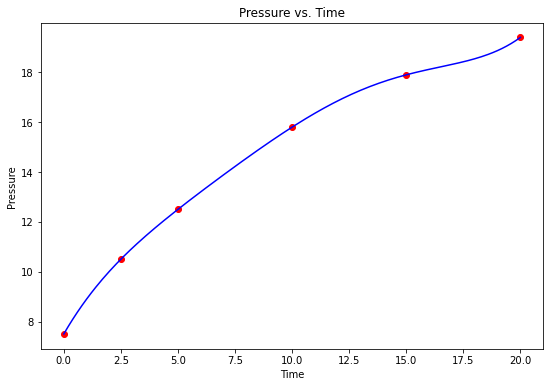

In [7]:
# code here
xtable = [0.0, 2.5, 5.0, 10, 15.0, 20.0]
ytable = [7.5, 10.5, 12.5, 15.8, 17.9, 19.4]

xpred = [] # empty list to store results for plotting
ypred = [] # empty list to store results for plotting

step_size = .1  # step size
how_many = int(20.0/step_size)

# build the predictions
for i in range(how_many+1): 
    xpred.append(float(i)*step_size)
    ypred.append(lagint(xtable,ytable,float(i)*step_size))

    
    #print(lagint(xtable,ytable,xwant))
#print(round(lagint(xtable,ytable,xwant),3))
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (9,6)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(xtable, ytable ,color ='red') # The observations as points
matplotlib.pyplot.plot(xpred, ypred, color ='blue') # the polynomial
matplotlib.pyplot.xlabel("Time") 
matplotlib.pyplot.ylabel("Pressure") 
mytitle = "Pressure vs. Time"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

---

## Problem 3. Data modeling to set production goals (15 pts.)

**Problem Statement**

The revenue and cost of operating from a small Beverly Hills auto bumper gold-plating company was collected over some time. Plot the cost, revenue, and profit( = revenue - cost) vs. number of bumpers plated.  Plot the cost data using circular markers, revenue using square markers, and profit using triangular markers.

Build a data model of the cost, revenue, and profit.  
Use the data model to predict the number of units to plate to:

- Minimize cost
- Maximize profit

 
|Bumpers Plated|Cost(Dollars)|Revenue(Dollars)|
|---|---|---|
| 0 |432 |0|
| 1 |426 |500|
| 3 |396 |1500|
| 4 |384 |2000|
| 9 |594 |4500| 
|13 |1446|6500|



**Deliverables**

1. Script to generate observed data and plots of cost, revenue, and profit
2. Plot of cost,revenue, and profit vs. units plated with
 - Axis labels and units
 - Plot title
 - Correct marker type as per specifications
3. Script to generate data model(s) (power-law, logarithmic, exponential, or polynomial functional form)
4. Analysis using the data model you choose
 - Best "fit" using trial-and-error
 - Report sum of squared residuals
5. Plot of the data model of cost vs. units plated, revenue vs. units plated, and profit vs. units plated on same chart as 2. above with
 - Correct line type and color (cost = red, revenue = blue, profit = green)
 - Legend to identify the plotted series.
6. Recomended production rate to maximize profit.  

   Bumpers Plated  Cost (Dollars)  Revenue (Dollars)  Profit
0             0.0           432.0                0.0  -432.0
1             1.0           426.0              500.0    74.0
2             3.0           396.0             1500.0  1104.0
3             4.0           384.0             2000.0  1616.0
4             9.0           594.0             4500.0  3906.0
5            13.0          1446.0             6500.0  5054.0


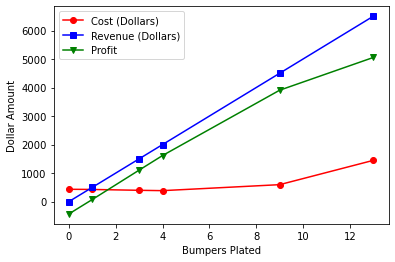

In [25]:
# code here
import pandas as pd
import matplotlib.pyplot as plt

data = [[0, 432, 0], [1,426, 500], [3, 396, 1500], [4, 384, 2000], [9,594,4500], [13,1446,6500]] 
df = pd.DataFrame(data, columns =['Bumpers Plated', 'Cost (Dollars)', 'Revenue (Dollars)'], dtype = float) 
 
profitcode = df['Revenue (Dollars)'] - df['Cost (Dollars)']

dfprofit = df.assign(Profit = profitcode)
print(dfprofit)

profitplot = dfprofit.plot('Bumpers Plated',y=['Cost (Dollars)','Revenue (Dollars)', 'Profit'], color = ['red','blue','green'], style = ['o-','s-','v-'])
plt.xlabel('Bumpers Plated')
plt.ylabel('Dollar Amount')
plt.show()


___
## Problem 4. (40 pts): On "Bottled Poetry" ...

<img src="https://w7w5t4b3.rocketcdn.me/wp-content/uploads/2016/04/game-of-thonres-tyrion-lannister-i-drink-and-i-know-things.jpg" width="500"> 


The "winequality-red.csv" and  "winequality-white.csv" datasets provide information related to red and white variants of vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. Follow the steps and answer the question. *Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).* 


#### The datasets consists of several Input variables (based on physicochemical tests). 

|Columns|Info.|
|---:|---:|
|fixed acidity |most acids involved with wine or fixed or nonvolatile (do not evaporate readily)|
|volatile acidity |the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste|
|citric acid |found in small quantities, citric acid can add 'freshness' and flavor to wines|
|residual sugar |the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter|
|chlorides |the amount of salt in the wine|
|free sulfur dioxide |the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion|
|total sulfur dioxide |amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine| 
|density |the density of water is close to that of water depending on the percent alcohol and sugar content|
|pH |describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4|
|sulphates |a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial|
|alcohol |the percent alcohol content of the wine|
|quality (score between 0 and 10) |output variable (based on sensory data, score between 0 and 10)|



**References:**

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. [https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub)

<!--
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
-->

Download the red-variety dataset from [https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) using the script below:

**If you get an error, then download using your browser and mouse**

In [ ]:
######### CODE TO AUTOMATICALLY DOWNLOAD THE DATABASE ################
#! pip install requests #install packages into local environment
import requests # import needed modules to interact with the internet
# make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' # a csv file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('winequality-red.csv', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

1.  Read the data as a data frame and print the first few rows. In a few lines explain what can be understood about the data from this.
2.  Use the appropriate function and get a summary of information on the data frame. Explain what you can learn from this summary report.
3.  Are there any missing values in the data? Justify your answer. 
4.  Use the appropriate function and get the 5-number summary for the data frame. Explain what you can learn from this summary report for each column.
5.  Rename the "quality (score _0to10)" column heading to "quality"
6.  Make a subset of all the wines with a quality above 7. Name this subset "TopQ".
7. What percentage of wines in "TopQ" has an alcohol content less than 10%? What is this percentage out of the entire set of wine (the original data)?
8. Print the above subset of the dataframe, sorted by wine quality. 
9. Define a function that labels the wines based on their quality according to the table below: <br>

|Quality Score|Label.|
|---:|---:|
|q>= 7|Top|
|5<q<7|Average|
|q<=5|Low|

10. Apply the function on the data frame and store the result in a new column "Qlabel".
11. Report the share of each quality label in percentage.
12. Plot a histogram of pH for all the Low quality wines. Explain what you can infer from this plot.
13. Make a similar histogram for pH for all the Top quality wines. Put the new histogram and the previous one next to each other and explain what you can infer by comparing them.

In [ ]:
# Put your code here - start with scaffolding and back-fill code
# Read the data as a data frame and print the first few rows. 
# Summary of information on the data frame. 
# Are there any missing values in the data? 
# ... put rest of scaffolding here
# ...
# ...
# Make a similar histogram for pH for all the Top quality wines. 
# ...

**Deliverables**
1. Script to read datafile and process as directed above
2. Function to generate wine quality label classifications as directed above.
3. Analysis using the function
4. Histograms (side-by-side) of low quality and high quality wines, as classified above.
 - Axis labels and units
 - Plot title
 - Suitable bin count

___
# Problem 5 (15 pts): To cause or to correlate; that is the question!

<img src="https://aspectmr.com/wp-content/uploads/2019/11/chicken_makes_you_go_to_the_moon.jpg" align="right" width="300">


1. What is the message behind the above image in relation to causation and correlation?
2. Why is it important to understand the difference between causation and correlation? 
3. Using your wine database, assume that the quality score can be treated as a continuous $~~~$  <br> variable (a *float*).  Determine the Pearson's correlation coefficient between pH and the quality score.  
4. What do you conclude from the correlation?

In [ ]:
# code here - correlation analysis

**Deliverables**
1. Answers to questions 1 and 2 above.
2. Working correlation analysis script on appropriate dataframe elements
3. Scatterplot of quality score (y-axis) versus pH (x-axis)
 - Axis labels and units
 - Plot title 
4. Conclusion (answer to last question above)

---
___

## <font color=green>Bonus Problem (10 points)</font>

Repeat Problem 4 using the white wine database. Download the white-variety dataset from [https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv) 

Is there evidence that pH is a predictor of wine quality?

In [ ]:
# code here

---
___

## <font color=blue>Bonus Problem (20 points)</font>

Consider the polynomial data model below: 

> Polynomial Model: $y_{model} = \beta_0 + \beta_1 x_{obs} + \beta_2 x_{obs}^2 + ... + \beta_n x_{obs}^n$ <br>
<!--Logarithmic Model: $y_{model} = \beta_0 + \beta_1 log(x_{obs}) $<br>
Power-Law Model: $y_{model} = \beta_0 x_{obs}^{\beta_1} $ <br>
Exponential Model: $y_{model} = \beta_0 e^{{\beta_1}x_{obs}} $ -->

One way to "fit" this model to data is to construct a design matrix $X$ comprised of $x_{obs}$ and ones (1). Then construct a linear system related to this design matrix.

The data model as a linear system is:

$$\begin{gather}
\mathbf{X} \cdot \mathbf{\beta} = \mathbf{Y}
\end{gather}$$

For example using the Polynomial Model (order 2 for brevity, but extendable as justified)

\begin{gather}
\mathbf{X}=
\begin{pmatrix}
1 & x_1 & x_1^2\\
~\\
1 & x_2 & x_2^2\\
~ \\
1 & x_3 & x_3^2\\
\dots & \dots & \dots \\
1 & x_n & x_n^2\\
\end{pmatrix}
\end{gather}

\begin{gather}
\mathbf{\beta}=
\begin{pmatrix}
\beta_0 \\
~\\
\beta_1 \\
~ \\
\beta_2 \\
\end{pmatrix}
\end{gather}

\begin{gather}
\mathbf{Y}=
\begin{pmatrix}
y_1 \\
~\\
y_2 \\
~ \\
y_3 \\
\dots  \\
y_n \\
\end{pmatrix}
\end{gather}

To find the unknown $\beta$ values the solution of the linear system below provides a "best linear unbiased estimator (BLUE)" fit

$$\begin{gather}
[\mathbf{X^T}\mathbf{X}] \cdot \mathbf{\beta} = [\mathbf{X^T}]\mathbf{Y}
\end{gather}$$

or an alternative expression is

$$\begin{gather}
\mathbf{\beta} = [\mathbf{X^T}\mathbf{X}]^{-1}[\mathbf{X^T}]\mathbf{Y}
\end{gather}$$

Once the values for $\beta$ are obtained then we can apply our plotting tools and use the model to extrapolate and interpolate.  Most of the arithmetic can be accomplished using numpy as in Lesson 9.

Consider the data collected during the boost-phase of a ballistic missle.  The maximum speed of a solid-fueled missle at burn-out (when the boost-phase ends) is about 7km/s. Using this knowledge and the early-time telemetry below; fit a data model using the linear system approach above. 

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7.4|
|3.0 |16.2|
|4.0 |23.5|
|5.0 |32.2|
|6.0 | 42.2| 
|7.0 | 65.1 |
|8.0 | 73.5 |
|9.0 | 99.3 |
|10.0| 123.4|

Use the model to estimate boost phase burn-out time.  Plot the model and data on the same axis to demonstrate the quality of the fit.

In [ ]:
# code here